In [ ]:
OS: Ubuntu 20.04.2 LTS

In [2]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**1. Распарсите файл references при помощи регулярных выражений и запишите оттуда все ftp ссылки в файл ftps (5 баллов)**


In [80]:
!wget https://raw.githubusercontent.com/Serfentum/bf_course/master/15.re/references

--2022-11-15 23:15:44--  https://raw.githubusercontent.com/Serfentum/bf_course/master/15.re/references
Распознаётся raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8003::154, 2606:50c0:8000::154, 2606:50c0:8001::154, ...
Подключение к raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа... 200 OK
Длина: 1206044 (1,1M) [text/plain]
Сохранение в каталог: ««references»».

references          100%[===================>]   1,15M  1,15MB/s    за 1,0s    

2022-11-15 23:15:46 (1,15 MB/s) - «references» сохранён [1206044/1206044]



In [22]:
with open('references') as reference:
    with open('links_from_reference.txt', 'w') as links:
        for line in reference.readlines():
            match = re.findall(r'ftp\.[./\w#]*', line)
            for line in match:
                print(line, file = links, sep = '\n')


**2. Извлеките из рассказа  2430 A.D. все числа  (5 баллов)**

In [8]:
!wget https://raw.githubusercontent.com/Serfentum/bf_course/master/15.re/2430AD

--2022-11-17 19:42:55--  https://raw.githubusercontent.com/Serfentum/bf_course/master/15.re/2430AD
Распознаётся raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8000::154, 2606:50c0:8002::154, ...
Подключение к raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа... 200 OK
Длина: 16759 (16K) [text/plain]
Сохранение в каталог: ««2430AD»».

2430AD              100%[===================>]  16,37K  --.-KB/s    за 0,005s  

2022-11-17 19:42:55 (3,13 MB/s) - «2430AD» сохранён [16759/16759]



In [9]:
with open('2430AD') as tale:
    for line in tale.readlines():
        match = re.findall(r'\d.\d?\d?', line)
        for number in match:
            print(number)


2430
1969
2430
2430
57
57
1970
3.68
35
460
2430


**3. Из того же рассказа извлеките все слова, в которых есть буква a, регистр при этом не важен  (5 баллов)**


In [10]:
words = []
with open('2430AD') as tale:
    for line in tale.readlines():
        match = re.findall(r"[A-Za-z]*[aA][A-Za-z]*", line)
        for line in match:
            words.append(line)
print(words)
# len(words)


['A', 'and', 'dawn', 'and', 'all', 'ache', 'have', 'a', 'nightmare', 'a', 'are', 'all', 'and', 'a', 'gleam', 'anywhere', 'an', 'original', 'a', 'personality', 'packed', 'talk', 'said', 'Alvarez', 'said', 'Social', 'eventually', 'An', 'character', 'escaped', 'adjustment', 'talking', 'irritates', 'past', 'tact', 'along', 'Trail', 'was', 'as', 'always', 'sparsely', 'have', 'taken', 'and', 'Alvarez', 'walking', 'Alvarez', 'was', 'tall', 'and', 'rather', 'athletic', 'a', 'muscular', 'activities', 'stairs', 'and', 'rampways', 'instance', 'almost', 'an', 'character', 'and', 'avoided', 'sunlamps', 'and', 'was', 'pale', 'said', 'want', 'can', 'have', 'square', 'space', 'and', 'has', 'apartment', 'Rather', 'a', 'a', 'way', 'said', 'Alvarez', 'And', 'a', 'Alvarez', 'added', 'matter', 'reach', 'peak', 'reach', 'reach', 'goal', 'All', 'mankind', 'And', 'said', 'at', 'that', 'way', 'that', 'against', 'plastic', 'passed', 'and', 'saw', 'distance', 'was', 'a', 'plankton', 'varieties', 'almost', 'that'

**4. Извлеките из рассказа все восклицательные предложения  (5 баллов)**

In [11]:
exclamation = []
with open('2430AD') as tale:
    for line in tale.readlines():
        match = re.findall(r"[A-Za-z ]*!", line)
        for line in match:
            exclamation.append(line)
            
print(exclamation)


['Yes!', 'Literally!', ' There was once a time!', ' Centuries ago!', ' Cranwitz!', 'If we succeed!']


**5. Постройте гистограмму распределения длин уникальных слов (без учёта регистра, длина от 1) в тексте.   (5 баллов)**

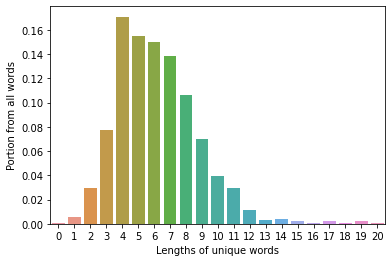

In [16]:
unique_lengths = {}
unique_words_list = []
all_words = []
length_n_prop = {}

# Creating list will all words

with open('2430AD') as tale:
    for line in tale.readlines():
        match = re.findall(r"[\w'-]*", line)
        for line in match:
            all_words.append(line.lower())

# Creating list of unique words
unique_words_list = list(set(all_words)) 

# Creating new dictianory with unique words and their lengths 

for word in unique_words_list:
    unique_lengths[word] = len(word)

# Creating list of lengths    
    
only_lengths = list(unique_lengths.values())

# Creating dictionary whith lengths and proportions

for number in only_lengths:
    length_n_prop[number] = only_lengths.count(number)/len(only_lengths)

# Creating barplot    
    
keys = list(length_n_prop.keys())
vals = list(length_n_prop.values())

fig = sns.barplot(x = keys, y = vals)
fig.set(xlabel='Lengths of unique words', ylabel='Portion from all words');

**6. Сделайте функцию-переводчик с русского на "кирпичный язык" (5 баллов)**

In [37]:
def brickify(string):
    vowels = ['а', 'у', 'о', 'и', 'э', 'ы', 'я', 'ю', 'е', 'ё']
    for letter in vowels:
        string = re.sub(f'{letter}', f'{letter}к{letter}', string)
    return string

string = input('Мяу мяу мяу')                            
brickify(string)                          

Мяу мяу мяу аэродоставка чайного гриба в саратов


'акаэкэрокодокостакавкака чакайнокогоко грикибака в сакаракатоков'